In [121]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [122]:
iris = load_iris()
print("key of iris: \n{}".format(iris.keys()))

key of iris: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [129]:
print(f"Type of data: {type(iris_dataset['data'])}")

Type of data: <class 'numpy.ndarray'>


In [123]:
# Fetch iris data
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

# Fetch iris target and add df_iris as class
df_iris['class'] = iris.target
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 2値分類

In [138]:
# Remain class value 0 and 1
two_value_df_iris = df_iris[df_iris['class'] != 2]  

two_value_df_iris = two_value_df_iris[['petal length (cm)', 'petal width (cm)', 'class']]

two_value_df_iris

,petal length (cm),petal width (cm),class
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
95,4.2,1.2,1
96,4.2,1.3,1
97,4.3,1.3,1
98,3.0,1.1,1


In [139]:
# Set explanatory variable other than class column
X = two_value_df_iris.iloc[:, :-1].values

# Set target class column
y = two_value_df_iris.iloc[:, -1].values

In [140]:
from sklearn.preprocessing import StandardScaler

# Standardization
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [141]:
from sklearn.model_selection import train_test_split

# Devide train data and test data
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=1, stratify=y)

In [142]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1, random_state=42, solver='lbfgs')
lr.fit(X_train, y_train)

LogisticRegression(C=1, random_state=42)

In [143]:
print(f"Train set score: {lr.score(X_train, y_train):.2f}")
print(f"Test set score: {lr.score(X_test, y_test):.2f}")

Train set score: 1.00
Test set score: 1.00


In [144]:
new_data_scaled = [[1, 0.2]]
prediction = lr.predict(new_data_scaled)
print(f"Prediction: {prediction}")
print(f"Predicted target name: {iris_dataset['target_names'][prediction]}")

Prediction: [1]
Predicted target name: ['versicolor']


## アルゴリズム（setosaとそれ以外の比較)

In [148]:
# 説明変数は花弁の幅とする
X = iris['data'][:, 3:]
y = (iris['target'] == 0).astype(np.int32)
logistic_regression = LogisticRegression()
logistic_regression.fit(X, y)
print(f"score: {logistic_regression.score(X, y):.2f}")

score: 1.00


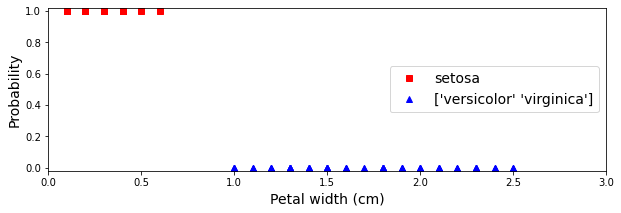

In [151]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.plot(X[y==1], y[y==1], "rs", label=iris_dataset.target_names[0])
plt.plot(X[y==0], y[y==0], "b^", label=iris_dataset.target_names[1:])
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center right", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

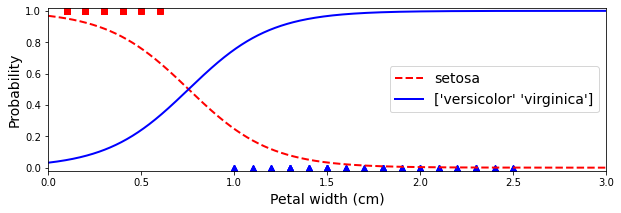

In [157]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = logistic_regression.predict_proba(X_new)

plt.figure(figsize=(10, 3))
plt.plot(X[y==1], y[y==1], "rs")
plt.plot(X[y==0], y[y==0], "b^")
plt.plot(X_new, y_proba[:, 1], "r--", linewidth=2, label=iris_dataset.target_names[0])
plt.plot(X_new, y_proba[:, 0], "b-", linewidth=2, label=iris_dataset.target_names[1:])
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center right", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()